### Mixture of Experts (MoE) Transformer with Llama4 type model 

Author: Tirth Shah  
Inspired by: https://github.com/FareedKhan-dev/train-llama4

#### Import Required Libraries and Modules

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Import our custom modules
from model import MoETransformer, ModelConfig
from prepare_data import CharDataset, TinyStoriesDataset
from train import TrainModel
import utils as utils

/Users/tirthshah/miniforge3/envs/moe-experiments/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Set random seed for reproducibility

In [2]:
torch.manual_seed(42)

#### Prepare Dataset

In [3]:
#--------- Sample text from Alice's Adventures in Wonderland ---------#
# This is a small excerpt to keep the dataset manageable for demonstration purposes.

# block_size = 64 # Define the block size for the dataset

# text = """
#     Alice was beginning to get very tired of sitting by her sister on the
#     bank, and of having nothing to do: once or twice she had peeped into the
#     book her sister was reading, but it had no pictures or conversations in
#     it, 'and what is the use of a book,' thought Alice 'without pictures or
#     conversation?'
#     So she was considering in her own mind (as well as she could, for the
#     hot day made her feel very sleepy and stupid), whether the pleasure
#     of making a daisy-chain would be worth the trouble of getting up and
#     picking the daisies, when suddenly a White Rabbit with pink eyes ran
#     close by her.
#     """

# dataset = CharDataset(text=text, block_size=block_size) # Create dataset

#--------- Tiny stories dataset ---------#

block_size = 64 # Define the block size for the dataset
dataset = TinyStoriesDataset(block_size=block_size, max_samples=1000)  # Load the dataset


TinyStoriesDataset loaded with 1000 stories and vocabulary size 5342


#### Initialize MoE Transformer Model

In [4]:
# Model configuration
model_config = ModelConfig(
    d_model=128, 
    n_layers=4,
    n_heads=4,
    block_size=block_size,
    vocab_size=dataset.tokenizer.vocab_size,
    rms_norm_eps=1e-5,
    rope_theta=10000.0,
    num_local_experts=4,
    num_experts_per_tok=2,
    intermediate_size_expert=256,
    intermediate_size_shared=256
)

# Initialize the model
model = MoETransformer(config=model_config)
model = model.to(model.config.device)

# Print model summary
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"Model initialized successfully!")
print(f"Total parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")

Model initialized successfully!
Total parameters: 3,598,464
Trainable parameters: 3,598,464


#### Train the Model

Setting up training configuration

In [5]:
train_model = TrainModel(
    model=model,
    batch_size=16,
    learning_rate=5e-4,
    epochs=3, # 3000 epochs
    print_interval=300,
    dataset=dataset,
    test_split=0.1
)

Training the model

Starting training...


100%|██████████| 3/3 [00:03<00:00,  1.27s/it]

  Epoch 3/3, Loss: 8.5376


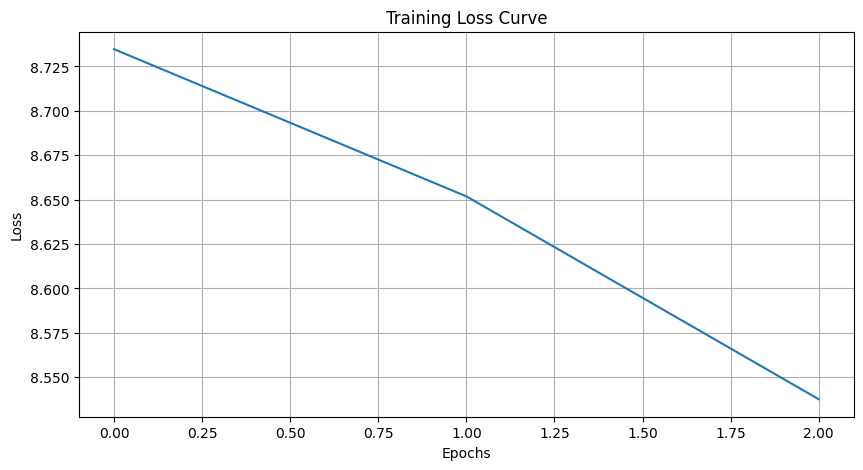

Training completed.
Final training loss: 8.5376


In [6]:
train_model.train()

print(f"Final training loss: {train_model.train_losses[-1]:.4f}")

#### Save the Model

In [7]:
utils.save_model(
    model=model,
    save_dir="./saved_models",
    save_name="moe_transformer.pth"
)

Model saved to ./saved_models/moe_transformer.pth


#### Generate some text using the trained model

In [7]:
model.generate(
    seed_text="Alice was beginning to get",
    tokenizer=dataset.tokenizer,
    max_new_tokens=100,
)

Generation loop finished.


'Alice was beginning to getipt built eaten cater deal beams must favor we playfulitsClar L set die clouds film 8 creating goggles respectfulashes cars pigs pattern pen laughing activity speed stops tieimiigh heroJohn spilling caring maze firm story unfair barkingmmoph visitors stuffingandyTake talked scrub gl else theny Dinner baseball crunch intention anticipation tongues argue networkPut flies Why comes separated vitamins spill amount addresses increased ourselves bowls generous roaring workers explainingarted rag feelings shremon pretending am pageOK was tissue stickymillendsmy paints swell finei set Unfortunately suffer'